In [14]:
import sympy as sp


In [15]:
x = sp.Symbol("x")
a = sp.Symbol("a")

In [87]:
def Legendre(i_arg, x, bound):
    a_arg, b_arg = bound
    a, b, x, i, m, k = sp.symbols(("a", "b", "x", "i", "m", "k"))
    polinomial_Legendre = sp.sympify(sp.sqrt((2*i+1)/(b-a))*sp.Sum(sp.Sum(((-1)**(i-m-k))/(2**(i-k))*sp.binomial(i, m)*sp.binomial(2*i-2*m, i)*sp.binomial(i-2*m, i-2*m-k)*((b+a)**(i-2*m-k))/((b-a)**(i-2*m))*(x**k), (k, 0, i - 2*m)), (m, 0, i//2)))
    polinomial_Legendre = polinomial_Legendre.subs([(i, i_arg), (a, a_arg), (b, b_arg)])
    return sp.simplify(polinomial_Legendre.doit())

In [17]:
def trigonometric_functions(i_arg, x, a_arg):
    a, x, i = sp.symbols(("a", "x", "i"))
    if i_arg == 0:
        S = sp.sympify(sp.sqrt(1/2/a))
    elif i_arg % 2 == 0:
        S = sp.sympify(sp.sqrt(1/a)*sp.cos(i*sp.pi/2/a*x))
    else:
        S = sp.sympify(sp.sqrt(1/a)*sp.sin((i+1)*sp.pi/2/a*x))
    S = S.subs([(i, i_arg), (a, a_arg)])
    return S

In [18]:
def Rademacher(k_arg, x):
    k, x = sp.symbols(("k", "x"))
    r = sp.sympify(sp.sign(sp.sin((2**k)*sp.pi*x)))
    r = r.subs(k, k_arg)
    return r.doit()

def Walsh(i, x):
    x = sp.symbols("x")
    binary = bin(i)[:1:-1]
    Omega = sp.sympify(1)
    for i in range(len(binary)):
        if binary[i] == "1":
            Omega = sp.sympify(Omega * Rademacher(i + 1, x))
    return Omega

In [19]:
def Hermit(i_arg, x):
    k, x, i = sp.symbols(("k", "x", "i"))
    Phi = sp.sympify(sp.E**(-x**2/2)*sp.sqrt(sp.factorial(i)/(2**i)/sp.sqrt(sp.pi))*sp.Sum((-1)**k*(2*x)**(i-2*k)/sp.factorial(k)/sp.factorial(i-2*k), (k, 0, i//2)))
    Phi = Phi.subs(i, i_arg)
    return sp.simplify(Phi.doit())

In [20]:
Hermit(3, x)

sqrt(3)*x*(2*x**2 - 3)*exp(-x**2/2)/(3*pi**(1/4))

In [21]:
trigonometric_functions(3, x, a)

sqrt(1/a)*sin(2*pi*x/a)

In [125]:
Walsh(3, x)
#Rademacher(1, x)

sign(sin(2*pi*x))*sign(sin(4*pi*x))

In [101]:
Legendre(1, x, (0, 1))

sqrt(3)*(2*x - 1)

In [119]:
f = sp.simplify(sp.sympify(input()))
a = sp.sympify(input())
b = sp.sympify(input())

x**10
0
1


In [69]:
h = []
n = 20

for i in range(n):
    h.append(sp.simplify(sp.integrate(f * trigonometric_functions(i, x, b), (x, a, b))))
print(h)

#i = s.Symbol("i")
#sp.simplify(sp.integrate(f * trigonometric_functions(i, x, a), (x, a, b)))

[0.0642824346533225, (-151200*pi**4 - 7257600 - 90*pi**8 + pi**10 + 5040*pi**6 + 1814400*pi**2)/pi**11, 10*(-362880 - 3024*pi**4 - pi**8 + 72*pi**6 + 60480*pi**2)/pi**10, (-630*pi**4 - 2*pi**8 - 14175 + 45*pi**6 + 4725*pi**2)/(4*pi**9), 5*(-36*pi**6 - 1890*pi**2 + 2835 + 2*pi**8 + 378*pi**4)/(4*pi**10), (-7290*pi**8 - 151200*pi**4 - 89600 + 201600*pi**2 + 45360*pi**6 + 729*pi**10)/(2187*pi**11), 10*(-81*pi**8 - 3024*pi**4 - 4480 + 6720*pi**2 + 648*pi**6)/(729*pi**10), (-512*pi**8 - 10080*pi**4 - 14175 + 18900*pi**2 + 2880*pi**6)/(2048*pi**9), 5*(-2304*pi**6 - 7560*pi**2 + 2835 + 6048*pi**4 + 512*pi**8)/(4096*pi**10), (-1406250*pi**8 - 3780000*pi**4 - 290304 + 1814400*pi**2 + 3150000*pi**6 + 390625*pi**10)/(1953125*pi**11), 2*(-78125*pi**8 - 378000*pi**4 - 72576 + 302400*pi**2 + 225000*pi**6)/(390625*pi**10), (-162*pi**8 - 630*pi**4 - 175 + 525*pi**2 + 405*pi**6)/(972*pi**9), 5*(-324*pi**6 - 210*pi**2 + 35 + 378*pi**4 + 162*pi**8)/(2916*pi**10), (-74118870*pi**8 - 51861600*pi**4 - 10368

In [70]:
f1 = sp.sympify(0)

for i in range(len(h)):
    f1 += h[i] * trigonometric_functions(i, x, b)
f1

(-151200*pi**4 - 7257600 - 90*pi**8 + pi**10 + 5040*pi**6 + 1814400*pi**2)*sin(pi*x)/pi**11 + (-630*pi**4 - 2*pi**8 - 14175 + 45*pi**6 + 4725*pi**2)*sin(2*pi*x)/(4*pi**9) + (-7290*pi**8 - 151200*pi**4 - 89600 + 201600*pi**2 + 45360*pi**6 + 729*pi**10)*sin(3*pi*x)/(2187*pi**11) + (-512*pi**8 - 10080*pi**4 - 14175 + 18900*pi**2 + 2880*pi**6)*sin(4*pi*x)/(2048*pi**9) + (-1406250*pi**8 - 3780000*pi**4 - 290304 + 1814400*pi**2 + 3150000*pi**6 + 390625*pi**10)*sin(5*pi*x)/(1953125*pi**11) + (-162*pi**8 - 630*pi**4 - 175 + 525*pi**2 + 405*pi**6)*sin(6*pi*x)/(972*pi**9) + (-74118870*pi**8 - 51861600*pi**4 - 1036800 + 12700800*pi**2 + 84707280*pi**6 + 40353607*pi**10)*sin(7*pi*x)/(282475249*pi**11) + (-131072*pi**8 - 161280*pi**4 - 14175 + 75600*pi**2 + 184320*pi**6)*sin(8*pi*x)/(1048576*pi**9) + (-47829690*pi**8 - 12247200*pi**4 - 89600 + 1814400*pi**2 + 33067440*pi**6 + 43046721*pi**10)*sin(9*pi*x)/(387420489*pi**11) + (-31250*pi**8 - 15750*pi**4 - 567 + 4725*pi**2 + 28125*pi**6)*sin(10*pi*x)

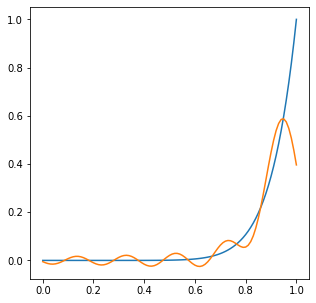

In [71]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(5, 5))
plt.plot([i/100 for i in range(0, 101)], [f.subs(x, i/100) for i in range(0, 101)])
plt.plot([i/100 for i in range(0, 101)], [f1.subs(x, i/100) for i in range(0, 101)])
plt.show()

In [113]:
"""С данной системой функций проблемы при интегрировании"""

h = []
n = 1 

for i in range(n):
    antiderivative = sp.simplify(sp.integrate(f * Hermit(i, x), x))
    h = sp.limit(antiderivative, x, +oo) - sp.limit(antiderivative, x, -oo)
print(h)


KeyboardInterrupt: 

In [ ]:
f1 = sp.sympify(0)

for i in range(len(h)):
    f1 += h[i] * Hermit(i, x)
f1

In [ ]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(5, 5))
plt.plot([i/100 for i in range(0, 101)], [f.subs(x, i/100) for i in range(0, 101)])
plt.plot([i/100 for i in range(0, 101)], [f1.subs(x, i/100) for i in range(0, 101)])
plt.show()

In [115]:
h = []
k = 50

for i in range(k):
    n = 2**len(bin(i)[:1:-1])
    a = 0
    for j in range(n):
        a += sp.simplify(sp.integrate(f * Walsh(i, x).subs(x, (2 * j + 1) / (2 * n)), (x, j / n, (j + 1) / n)))
    h.append(a)
print(h)

#i = s.Symbol("i")
#sp.simplify(sp.integrate(f * trigonometric_functions(i, x, a), (x, a, b)))

[0.0909090909090909, -0.0908203125000000, -0.0833187103271485, 0.0832300186157227, -0.0557868294417858, 0.0557054635137320, 0.0500859254971147, -0.0500046461820602, -0.0303542634574114, 0.0302997841317847, 0.0270654408141127, -0.0270110409474000, 0.0173903476324995, -0.0173414355958812, -0.0150488012877759, 0.0149999686254887, -0.0155111830776349, 0.0154815402422273, 0.0138036944012860, -0.0137741047683448, 0.00885433738702623, -0.00882790629248120, -0.00764548721122082, 0.00761910924154562, 0.00474212855109445, -0.00472514578973459, -0.00406291202068586, 0.00404597702498676, -0.00249606449386873, 0.00248136839886114, 0.00204667515724564, -0.00203202675038482, -0.00779821442853721, 0.00778306678881296, 0.00693630622780025, -0.00692118753615745, 0.00444738227408025, -0.00443390210376649, -0.00383806830064338, 0.00382461702645554, 0.00238159303643864, -0.00237294622258412, -0.00203936935068596, 0.00203074834844721, -0.00125248445671524, 0.00124501816061053, 0.00102638686144410, -0.001018

In [116]:
f1 = sp.sympify(0)

for i in range(len(h)):
    f1 += h[i] * Walsh(i, x)
f1

-0.00203202675038482*sign(sin(2*pi*x))*sign(sin(4*pi*x))*sign(sin(8*pi*x))*sign(sin(16*pi*x))*sign(sin(32*pi*x)) - 0.0010189463250754*sign(sin(2*pi*x))*sign(sin(4*pi*x))*sign(sin(8*pi*x))*sign(sin(16*pi*x))*sign(sin(64*pi*x)) + 0.0149999686254887*sign(sin(2*pi*x))*sign(sin(4*pi*x))*sign(sin(8*pi*x))*sign(sin(16*pi*x)) + 0.00761910924154562*sign(sin(2*pi*x))*sign(sin(4*pi*x))*sign(sin(8*pi*x))*sign(sin(32*pi*x)) + 0.00382461702645554*sign(sin(2*pi*x))*sign(sin(4*pi*x))*sign(sin(8*pi*x))*sign(sin(64*pi*x)) - 0.0500046461820602*sign(sin(2*pi*x))*sign(sin(4*pi*x))*sign(sin(8*pi*x)) + 0.00404597702498676*sign(sin(2*pi*x))*sign(sin(4*pi*x))*sign(sin(16*pi*x))*sign(sin(32*pi*x)) + 0.00203074834844721*sign(sin(2*pi*x))*sign(sin(4*pi*x))*sign(sin(16*pi*x))*sign(sin(64*pi*x)) - 0.0270110409474*sign(sin(2*pi*x))*sign(sin(4*pi*x))*sign(sin(16*pi*x)) - 0.0137741047683448*sign(sin(2*pi*x))*sign(sin(4*pi*x))*sign(sin(32*pi*x)) - 0.00692118753615745*sign(sin(2*pi*x))*sign(sin(4*pi*x))*sign(sin(64*pi*x

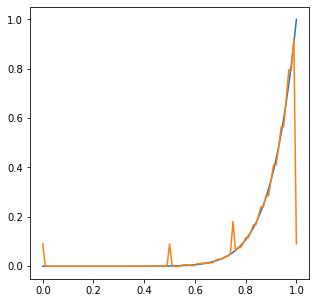

In [117]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(5, 5))
plt.plot([i/100 for i in range(0, 101)], [f.subs(x, i/100) for i in range(0, 101)])
plt.plot([i/100 for i in range(0, 101)], [f1.subs(x, i/100) for i in range(0, 101)])
plt.show()

In [120]:
h = []
n = 10

for i in range(n):
    h.append(sp.simplify(sp.integrate(f * Legendre(i, x, (a, b)), (x, a, b))))
print(h)

#i = s.Symbol("i")
#sp.simplify(sp.integrate(f * trigonometric_functions(i, x, a), (x, a, b)))

1
sqrt(3)*(2*x - 1)
sqrt(5)*(6*x**2 - 6*x + 1)
sqrt(7)*(20*x**3 - 30*x**2 + 12*x - 1)
210*x**4 - 420*x**3 + 270*x**2 - 60*x + 3
sqrt(11)*(252*x**5 - 630*x**4 + 560*x**3 - 210*x**2 + 30*x - 1)
sqrt(13)*(924*x**6 - 2772*x**5 + 3150*x**4 - 1680*x**3 + 420*x**2 - 42*x + 1)
sqrt(15)*(3432*x**7 - 12012*x**6 + 16632*x**5 - 11550*x**4 + 4200*x**3 - 756*x**2 + 56*x - 1)
sqrt(17)*(12870*x**8 - 51480*x**7 + 84084*x**6 - 72072*x**5 + 34650*x**4 - 9240*x**3 + 1260*x**2 - 72*x + 1)
sqrt(19)*(48620*x**9 - 218790*x**8 + 411840*x**7 - 420420*x**6 + 252252*x**5 - 90090*x**4 + 18480*x**3 - 1980*x**2 + 90*x - 1)
[1/11, 5*sqrt(3)/66, 15*sqrt(5)/286, 30*sqrt(7)/1001, 6/143, 3*sqrt(11)/572, 15*sqrt(13)/9724, 5*sqrt(15)/14586, 5*sqrt(17)/92378, sqrt(19)/184756]


In [121]:
f1 = sp.sympify(0)

for i in range(len(h)):
    f1 += h[i] * Legendre(i, x, (a, b))
f1

5*x**9 - 405*x**8/38 + 240*x**7/19 - 2940*x**6/323 + 1323*x**5/323 - 735*x**4/646 + 60*x**3/323 - 135*x**2/8398 + 5*x/8398 - 1/184756

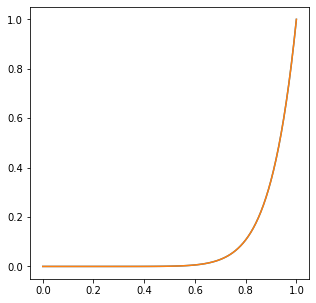

In [123]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(5, 5))
plt.plot([i/100 for i in range(0, 101)], [f.subs(x, i/100) for i in range(0, 101)])
plt.plot([i/100 for i in range(0, 101)], [f1.subs(x, i/100) for i in range(0, 101)])
plt.show()